# Loading the dataset

In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']
df = pd.read_csv(r"C:\Users\sreek\OneDrive\Desktop\ACM\training.1600000.processed.noemoticon.csv.zip", encoding='latin-1', names=columns)

df_sample = df.sample(n=50000, random_state=42).copy()

def clean_tweet(text):
    text = re.sub(r"http\S+|www.\S+", "", text)     # Remove URLs
    text = re.sub(r"@\w+", "", text)                # Remove mentions
    text = re.sub(r"#", "", text)                   # Remove hashtags but keep word
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)      # Remove special characters/emojis
    text = text.lower()                             # Lowercase
    text = text.strip()                             # Strip spaces
    return text

df_sample["clean_text"] = df_sample["text"].apply(clean_tweet)
print(df_sample[["text", "clean_text"]].head())

                                                     text  \
541200             @chrishasboobs AHHH I HOPE YOUR OK!!!    
750     @misstoriblack cool , i have no tweet apps  fo...   
766711  @TiannaChaos i know  just family drama. its la...   
285055  School email won't open  and I have geography ...   
705995                             upper airways problem    

                                               clean_text  
541200                                ahhh i hope your ok  
750             cool  i have no tweet apps  for my razr 2  
766711  i know  just family drama its lamehey next tim...  
285055  school email wont open  and i have geography s...  
705995                              upper airways problem  


# Map Sentiment Labels

In [2]:
sentiment_mapping = {0: "Negative", 2: "Neutral", 4: "Positive"}
numeric_mapping = {"Negative": -1, "Neutral": 0, "Positive": 1}

df_sample["label"] = df_sample["sentiment"].map(sentiment_mapping)
df_sample["label_num"] = df_sample["label"].map(numeric_mapping)

# Drop rows with unmapped labels (just in case)
df_sample.dropna(subset=["label_num"], inplace=True)

# TF-IDF Feature Extraction

In [3]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df_sample["clean_text"])
y = df_sample["label_num"]


# Logistic Regression

In [4]:
# === Step 7: Split into Train and Test Sets ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Step 8: Train Model (Logistic Regression) ===
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# === Step 9: Predict and Evaluate ===
y_pred = model.predict(X_test)

# Accuracy and Confusion Matrix Visualization:


Accuracy: 0.7685

Classification Report:
              precision    recall  f1-score   support

    Negative       0.77      0.76      0.76      4977
    Positive       0.76      0.78      0.77      5023

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



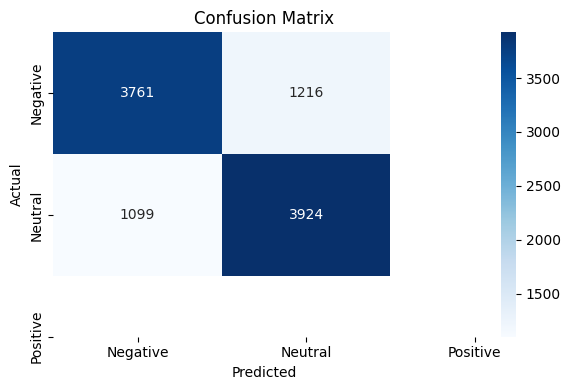

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
from sklearn.utils.multiclass import unique_labels

# Get actual labels present in the test set
labels = sorted(unique_labels(y_test, y_pred))
name_map = {-1: "Negative", 0: "Neutral", 1: "Positive"}
target_names = [name_map[label] for label in labels]

print(classification_report(y_test, y_pred, labels=labels, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## Model Chosen:
### Logistic Regression, because it's efficient and works well for large text datasets.

## How TF-IDF Helped:
### TF-IDF helped extract the most important words from tweets and turned them into numerical values that the model can understand.

## Challenges Faced:
### 1.Dataset had no headers, so manual column naming was needed.
### 2.Text cleaning was essential to remove noise like URLs and mentions.
### 3.Balancing accuracy and performance with a large dataset required reducing features (using top 5000 words).